In [15]:
import pandas as pd
import numpy as np
import ast
import sys
import skimage.io
import skimage.viewer
import os
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
import ast 
from scipy import stats
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


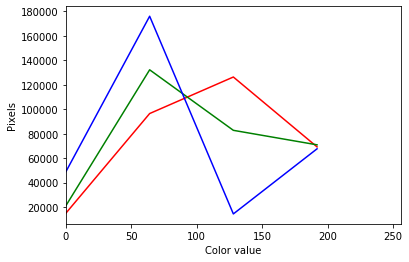

In [16]:

# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=os.path.join(os.getcwd(), 'flattened_pics', '1548779251774.jpg'))

# disp 1lay the image
#image = os.path.join(os.getcwd(), 'flattened_pics', '1548779251774.jpg')
#viewer = skimage.viewer.Viewer(image)
#viewer.show()

colors = ("r", "g", "b")
channel_ids = (0, 1, 2)
hist_dict = dict()
# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=4, range=(0, 256)
    )
    hist_dict[c] = histogram
    plt.plot(bin_edges[0:-1], histogram, color=c)
    

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [17]:
def color_dist(x):
    image = skimage.io.imread(fname=os.path.join(os.getcwd(), 'flattened_pics', x))
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    hist_dict = dict()
    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins = 4, range=(0, 256)
            )
        hist_dict[c] = histogram
    return hist_dict

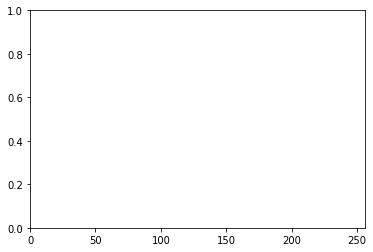

In [18]:
df = pd.read_csv('objects.csv')
pics = ['pic_1', 'pic_2_1','pic_2_2',  'pic_2_3',  'pic_2_4', 'pic_2_5']

for i in pics:
    p = i + 'rgb'
    df[p] = df[i].apply(color_dist)
    #print(df[p][0])

In [19]:
rgb = df[['Unnamed: 0', 'Unnamed: 1', 'municipality', 'commune', 'pic_1',
        'pic_2_1', 'pic_2_2', 
       'pic_2_3',  'pic_2_4',  'pic_2_5', 'pic_1.1','gpsLatitude', 'gpsLongitude',
       'address', 'total_income_2_b', 'total_deprivations',  'Wealth_Index',
       'total_deprivations_2', 'Poor_MPI', 'Severely_Poor_MPI', 'pic_1rgb',
       'pic_2_1rgb', 'pic_2_2rgb', 'pic_2_3rgb', 'pic_2_4rgb', 'pic_2_5rgb']]

In [20]:
r = lambda x: x['r']
g = lambda x: x['g']
b = lambda x: x['b']


pics = ['pic_1', 'pic_2_1','pic_2_2',  'pic_2_3',  'pic_2_4', 'pic_2_5']

for i in pics:
    p = i + 'rgb'
    red = 'red_' + i
    rgb[red] = rgb[p].apply(r)
    green = 'green_' + i
    rgb[green] = rgb[p].apply(g)
    blue = 'blue_' + i
    rgb[blue] = rgb[p].apply(b)

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [21]:
rgb.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'municipality', 'commune', 'pic_1',
       'pic_2_1', 'pic_2_2', 'pic_2_3', 'pic_2_4', 'pic_2_5', 'pic_1.1',
       'gpsLatitude', 'gpsLongitude', 'address', 'total_income_2_b',
       'total_deprivations', 'Wealth_Index', 'total_deprivations_2',
       'Poor_MPI', 'Severely_Poor_MPI', 'pic_1rgb', 'pic_2_1rgb', 'pic_2_2rgb',
       'pic_2_3rgb', 'pic_2_4rgb', 'pic_2_5rgb', 'red_pic_1', 'green_pic_1',
       'blue_pic_1', 'red_pic_2_1', 'green_pic_2_1', 'blue_pic_2_1',
       'red_pic_2_2', 'green_pic_2_2', 'blue_pic_2_2', 'red_pic_2_3',
       'green_pic_2_3', 'blue_pic_2_3', 'red_pic_2_4', 'green_pic_2_4',
       'blue_pic_2_4', 'red_pic_2_5', 'green_pic_2_5', 'blue_pic_2_5'],
      dtype='object')

In [22]:
pics = ['pic_2_1','pic_2_2',  'pic_2_3',  'pic_2_4', 'pic_2_5']

rgb['r_total'] = rgb['red_pic_1'] + rgb['red_pic_2_1'] + rgb['red_pic_2_2']
+ rgb['red_pic_2_3'] + rgb['red_pic_2_4'] + rgb['red_pic_2_5']


/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       [289106, 194371, 291193, 146930]
1        [77381, 362351, 249546, 232322]
2        [32004, 126523, 370148, 162525]
3        [128989, 301374, 417148, 74089]
4        [188166, 237074, 461431, 34929]
                      ...               
1195     [135833, 177321, 311594, 66452]
1196      [61712, 262195, 269181, 98112]
1197     [51712, 175527, 400227, 294134]
1198    [226834, 154102, 132599, 177665]
1199      [46506, 129671, 649558, 95865]
Length: 1200, dtype: object

In [23]:
rgb['g_total'] = rgb['green_pic_1'] + rgb['green_pic_2_1'] + rgb['green_pic_2_2']
+ rgb['green_pic_2_3'] + rgb['green_pic_2_4'] + rgb['green_pic_2_5']

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       [319384, 185235, 278632, 138349]
1        [91037, 408052, 180487, 242024]
2         [68762, 152379, 425993, 44066]
3        [157782, 266527, 422288, 75003]
4        [196141, 253063, 431167, 41229]
                      ...               
1195     [135255, 150282, 324689, 80974]
1196      [61587, 284934, 264403, 80276]
1197     [83747, 243114, 490936, 103803]
1198    [265526, 131655, 134857, 159162]
1199      [48982, 166448, 651235, 54935]
Length: 1200, dtype: object

In [24]:
rgb['b_total'] = rgb['blue_pic_1'] + rgb['blue_pic_2_1'] + rgb['blue_pic_2_2'] + rgb['blue_pic_2_3']
+ rgb['blue_pic_2_4'] + rgb['blue_pic_2_5']

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       [203461, 155340, 195746, 59853]
1       [123626, 274223, 134261, 82290]
2       [102801, 158090, 184738, 15171]
3       [198636, 238914, 129093, 47757]
4       [144150, 212782, 218435, 39033]
                     ...               
1195    [144867, 126360, 145233, 44340]
1196     [52094, 221190, 171604, 15912]
1197     [51450, 188166, 337830, 36954]
1198      [216214, 77039, 90945, 76602]
1199     [87469, 141692, 333487, 51752]
Length: 1200, dtype: object

In [25]:
rgb.head()

,Unnamed: 0,Unnamed: 1,municipality,commune,pic_1,pic_2_1,pic_2_2,pic_2_3,pic_2_4,pic_2_5,...,blue_pic_2_3,red_pic_2_4,green_pic_2_4,blue_pic_2_4,red_pic_2_5,green_pic_2_5,blue_pic_2_5,r_total,g_total,b_total
0,uuid:00067e52-4e8c-4035-b16e-c977266597d7,Jan 29,Cazenga,Hoji Ya Henda,1548773782221.jpg,1548773793789.jpg,1548773803967.jpg,1548773819169.jpg,1548773827662.jpg,1548773841325.jpg,...,"[140462, 75363, 43040, 48335]","[168416, 49127, 38514, 51143]","[173852, 43318, 27069, 62961]","[161434, 56382, 73360, 16024]","[27127, 97468, 145999, 36606]","[34258, 95095, 127789, 50058]","[42027, 98958, 122386, 43829]","[166473, 255545, 332009, 167573]","[175503, 281553, 244553, 219991]","[348826, 389904, 295146, 194924]"
1,uuid:001e9a75-3867-4f2f-8cfa-ac55d5f21e1e,Jan 29,Cazenga,Hoji Ya Henda,1548779218481.jpg,1548779234464.jpg,1548779251774.jpg,1548779271753.jpg,1548779283846.jpg,1548779298188.jpg,...,"[49240, 162891, 5484, 89585]","[26474, 102607, 101183, 76936]","[25474, 109155, 94231, 78340]","[38227, 173122, 17769, 78082]","[31452, 77137, 133560, 65051]","[43829, 114497, 75776, 73098]","[85399, 101101, 116492, 4208]","[83657, 207810, 415642, 214491]","[105131, 283444, 345765, 187260]","[272103, 499646, 297446, 159605]"
2,uuid:0048aeab-1661-4c12-9e82-d75c54c6c6d3,Feb 9,Viana,Viana Sede,1549704140807.jpg,1549704150739.jpg,1549704163506.jpg,1549704174059.jpg,1549704182681.jpg,1549704197699.jpg,...,"[32424, 135224, 56022, 6730]","[9081, 31110, 130191, 60018]","[29905, 36954, 160553, 2988]","[58280, 76350, 80788, 14982]","[12571, 47515, 123551, 46763]","[19952, 46193, 159985, 4270]","[44521, 81740, 103950, 189]","[54084, 216176, 243503, 177437]","[98491, 253494, 192961, 146254]","[194212, 414595, 189171, 123622]"
3,uuid:006c58c6-cefd-4552-bd9a-7200d11b5bfb,Feb 8,Viana,Viana Sede,1549638155112.jpg,1549638165019.jpg,1549638176305.jpg,1549638185914.jpg,1549638195758.jpg,1549638203739.jpg,...,"[18795, 86469, 201742, 194]","[51280, 168091, 30258, 57571]","[60375, 168369, 12073, 66383]","[101435, 134007, 24025, 47733]","[62564, 66350, 162153, 16133]","[79142, 35164, 184870, 8024]","[97201, 104907, 105068, 24]","[88793, 311349, 430514, 90944]","[60186, 353728, 389886, 117800]","[90033, 540702, 497512, 100553]"
4,uuid:00ae6e8f-93b1-475f-a0ba-69eb6bd6b942,Jan 31,Maianga,Cassequel,1548948507643.jpg,1548948520502.jpg,1548948534497.jpg,1548948545460.jpg,1548948558899.jpg,1548948571618.jpg,...,"[113472, 15669, 178054, 5]","[69308, 62604, 173536, 1752]","[70358, 72327, 161806, 2709]","[81041, 80940, 142548, 2671]","[21602, 146237, 106223, 33138]","[27413, 153500, 87823, 38464]","[63109, 131842, 75887, 36362]","[89929, 342388, 451596, 37687]","[98826, 375781, 401746, 45247]","[269705, 392074, 529489, 37532]"


In [26]:
r_cols = ['r' + str(i) for i in range(4)]
g_cols = ['g' + str(i) for i in range(4)]
b_cols = ['b' + str(i) for i in range(4)]

In [27]:
r_df = pd.DataFrame(rgb['r_total'].to_list(), columns= r_cols)
g_df = pd.DataFrame(rgb['g_total'].to_list(), columns= g_cols)
b_df = pd.DataFrame(rgb['b_total'].to_list(), columns= b_cols)

In [28]:
cmodel = pd.concat([r_df, g_df, b_df], axis=1, sort=False)
cmodel[['total_income_2_b',
       'total_deprivations', 'Wealth_Index', 'total_deprivations_2',
       'Poor_MPI', 'Severely_Poor_MPI']] = rgb[['total_income_2_b',
       'total_deprivations', 'Wealth_Index', 'total_deprivations_2',
       'Poor_MPI', 'Severely_Poor_MPI']]

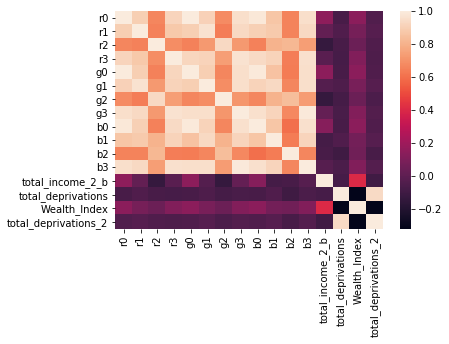

In [29]:
corrMatrix = cmodel.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [30]:
#32 bin regression
x = cmodel[r_cols+g_cols+b_cols]
y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))






Mean squared error: 4.71
R2: 0.0407


In [31]:
cmodel[['train', 'truck', 'car',  'potted plant','person']] = df[['train', 'truck', 'car',  'potted plant','person']]

In [32]:
#32 bin regression with object detection Wealth Index
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person']]
y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))




Mean squared error: 4.28
R2: 0.1279


In [33]:
#32 bin regression with object detection for total deprevtion
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant']]
y = cmodel['total_deprivations']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))




Mean squared error: 0.02
R2: 0.0298


In [34]:
#10 bin regression with object deterction for total income
x = cmodel.dropna()[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant']]
y = cmodel.dropna()['total_income_2_b']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))




Mean squared error: 14379785838.60
R2: 0.0490


In [35]:
cmodel.shape

(1200, 23)

In [36]:
cmodel.to_csv('cmodel_4bins.csv')

In [21]:
cmodel['poor_bool'] = cmodel['Poor_MPI'] == 'Poor'
cmodel['poor_bool']

cmodel['Severely_poor_bool'] = cmodel['Severely_Poor_MPI'] == 'Poor'




In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [24]:
def logreg(col):
    print('Predicting for ', col)
    dep = r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant']
    #print('Regressors: ', dep)
    X_train, X_test, y_train, y_test = train_test_split(cmodel[dep],cmodel[col],train_size=0.8)
    model= LogisticRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print("Model Score: ", model.score(X_test,y_test))
    print('Mean Predicted: ', np.mean(y_predicted))
    print('Mean of all observations: ', np.mean(cmodel[col]))
    print("Number of categories: ", len(set(cmodel[col])))
    print('SDG CLASSIFIER \n')
    clf = SGDClassifier(loss="hinge", penalty="l2")
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    print('SGDC Score: ', clf.score(X_test,y_test))
    print('Mean Predicted: ', np.mean(y_predicted))
    print('Mean of all observations: ', np.mean(cmodel[col]))

In [25]:
logreg('poor_bool')

Predicting for  poor_bool
Model Score:  0.5375
Mean Predicted:  0.6
Mean of all observations:  0.565
Number of categories:  2
SDG CLASSIFIER 

SGDC Score:  0.5291666666666667
Mean Predicted:  0.8166666666666667
Mean of all observations:  0.565


/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
logreg('Severely_poor_bool')

Predicting for  Severely_poor_bool
Model Score:  0.8166666666666667
Mean Predicted:  0.07916666666666666
Mean of all observations:  0.10166666666666667
Number of categories:  2
SDG CLASSIFIER 

SGDC Score:  0.8208333333333333
Mean Predicted:  0.06666666666666667
Mean of all observations:  0.10166666666666667


/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
#Adding in color mean values to the regression

In [28]:
color_mean = pd.read_csv('rgb_mean.csv')
cmodel[['r_mean', 'g_mean', 'b_mean']] = color_mean[['r_mean', 'g_mean', 'b_mean']]

In [35]:
#32 bin regression with object detection and color means for Wealth Index
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car',  'potted plant', 'person', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['Wealth_Index']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))


Mean squared error: 3.77
R2: 0.2329


In [36]:
#32 bin regression with object deterction for total income
x = cmodel.dropna()[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel.dropna()['total_income_2_b']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))

Mean squared error: 12832320475.00
R2: 0.1514


In [38]:
#32 bin regression with object deterction for total income
x = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['total_deprivations']
linear_regression = LinearRegression()
linear_regression.fit(x, y)

pred = linear_regression.predict(x)


#print('Coefficients: \n', linear_regression.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred))

print('R2: %.4f'
      % r2_score(y, pred))

Mean squared error: 0.02
R2: 0.1149


In [39]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [40]:
X = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['Wealth_Index']
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Wealth_Index   R-squared (uncentered):                   0.233
Model:                            OLS   Adj. R-squared (uncentered):              0.162
Method:                 Least Squares   F-statistic:                              3.268
Date:                Fri, 29 May 2020   Prob (F-statistic):                    5.90e-22
Time:                        00:14:43   Log-Likelihood:                         -2498.4
No. Observations:                1200   AIC:                                      5201.
Df Residuals:                    1098   BIC:                                      5720.
Df Model:                         102                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
r0             4.77e-06   1.64e-05      0.292      0.771   -2.73e-05    3.69e-05
r1            4.737e-06   1.04e-05      0.457      0.648   -1.56e-05    2.51e-05
r2           -8.287e-07   9.34e-06     -0.089      0.929   -1.92e-05    1.75e-05
r3            2.808e-05   1.55e-05      1.813      0.070   -2.32e-06    5.85e-05
r4           -2.652e-05   2.93e-05     -0.904      0.366   -8.41e-05    3.11e-05
r5            4.027e-07   5.19e-05      0.008      0.994      -0.000       0.000
r6            -1.28e-05   6.82e-05     -0.188      0.851      -0.000       0.000
r7               0.0001   6.26e-05      2.227      0.026    1.65e-05       0.000
r8              -0.0002   5.21e-05     -2.966      0.003      -0.000   -5.23e-05
r9            7.204e-05   4.56e-05      1.579      0.115   -1.75e-05       0.000
r10           1.306e-05    4.1e-05      0.319      0.750   -6.73e-05    9.34e-05
r11           -4.12e-05      4e-05     -1.030      0.303      -0.000    3.73e-05
r12          -2.692e-06   3.57e-05     -0.075      0.940   -7.27e-05    6.73e-05
r13            2.55e-05   3.34e-05      0.764      0.445      -4e-05     9.1e-05
r14          -5.105e-05   2.99e-05     -1.709      0.088      -0.000    7.57e-06
r15           4.171e-05   2.42e-05      1.722      0.085   -5.81e-06    8.92e-05
r16          -3.813e-05   1.86e-05     -2.046      0.041   -7.47e-05   -1.56e-06
r17           3.191e-05   1.55e-05      2.053      0.040    1.41e-06    6.24e-05
r18          -2.184e-05   1.29e-05     -1.692      0.091   -4.72e-05    3.48e-06
r19           5.351e-06   1.07e-05      0.500      0.617   -1.56e-05    2.63e-05
r20           5.176e-06   9.94e-06      0.521      0.602   -1.43e-05    2.47e-05
r21          -5.698e-06   8.89e-06     -0.641      0.522   -2.31e-05    1.17e-05
r22          -4.919e-06    7.7e-06     -0.639      0.523      -2e-05    1.02e-05
r23            6.31e-06   6.68e-06      0.945      0.345   -6.79e-06    1.94e-05
r24           -2.24e-06   6.91e-06     -0.324      0.746   -1.58e-05    1.13e-05
r25           8.618e-07   7.92e-06      0.109      0.913   -1.47e-05    1.64e-05
r26          -4.841e-06   8.85e-06     -0.547      0.585   -2.22e-05    1.25e-05
r27          -6.874e-06   7.96e-06     -0.863      0.388   -2.25e-05    8.75e-06
r28           8.541e-07   8.86e-06      0.096      0.923   -1.65e-05    1.82e-05
r29          -1.757e-05   1.46e-05     -1.207      0.228   -4.62e-05     1.1e-05
r30            1.84e-05    1.8e-05      1.024      0.306   -1.69e-05    5.37e-05
r31          -2.517e-06   6.02e-06     -0.418      0.676   -1.43e-05     9.3e-06
g0            -2.02e-05   1.89e-05     -1.067      0.286   -5.74e-05     1.7e-05
g1           -1.115e-05   1.45e-05     -0.768      0.443   -3.96e-05

In [34]:
X = cmodel[r_cols+g_cols+b_cols + ['train', 'truck', 'car', 'person',  'potted plant', 'r_mean', 'g_mean', 'b_mean']]
y = cmodel['total_income_2_b']
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/yojeremijenko-conel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       total_income_2_b   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Fri, 29 May 2020   Prob (F-statistic):                         nan
Time:                        00:11:51   Log-Likelihood:                             nan
No. Observations:                1200   AIC:                                        nan
Df Residuals:                    1098   BIC:                                        nan
Df Model:                         102                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
r0                  nan        nan        nan        nan         nan         nan
r1                  nan        nan        nan        nan         nan         nan
r2                  nan        nan        nan        nan         nan         nan
r3                  nan        nan        nan        nan         nan         nan
r4                  nan        nan        nan        nan         nan         nan
r5                  nan        nan        nan        nan         nan         nan
r6                  nan        nan        nan        nan         nan         nan
r7                  nan        nan        nan        nan         nan         nan
r8                  nan        nan        nan        nan         nan         nan
r9                  nan        nan        nan        nan         nan         nan
r10                 nan        nan        nan        nan         nan         nan
r11                 nan        nan        nan        nan         nan         nan
r12                 nan        nan        nan        nan         nan         nan
r13                 nan        nan        nan        nan         nan         nan
r14                 nan        nan        nan        nan         nan         nan
r15                 nan        nan        nan        nan         nan         nan
r16                 nan        nan        nan        nan         nan         nan
r17                 nan        nan        nan        nan         nan         nan
r18                 nan        nan        nan        nan         nan         nan
r19                 nan        nan        nan        nan         nan         nan
r20                 nan        nan        nan        nan         nan         nan
r21                 nan        nan        nan        nan         nan         nan
r22                 nan        nan        nan        nan         nan         nan
r23                 nan        nan        nan        nan         nan         nan
r24                 nan        nan        nan        nan         nan         nan
r25                 nan        nan        nan        nan         nan         nan
r26                 nan        nan        nan        nan         nan         nan
r27                 nan        nan        nan        nan         nan         nan
r28                 nan        nan        nan        nan         nan         nan
r29                 nan        nan        nan        nan         nan         nan
r30                 nan        nan        nan        nan         nan         nan
r31                 nan        nan        nan        nan         nan         nan
g0                  nan        nan        nan        nan         nan         nan
g1                  nan        nan        nan        nan         nan

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()